## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [367]:
df = pd.read_excel('/content/GSS.xlsx')

I chose to use GSS data that compared spousal data. I felt that it could create an interesting story of how people matched up based on information about their careers. This information includes year the census was taken(year), their respondent id number(id_), their marital status, their labor force status(wrkstat and spwrksta), hours worked in one week typically(hrs2 and sphrs2), spouses occupational prestige score(prestige and sppres), their census occupation code(occ10 and spocc10), their industry code(indus10 and spind10), and their highest level of education(educ and speduc). I think seeing the changes in both marital status, and relationship with work will be interested given a societal shift to "hustle culture" and overworking in the corporate world. I will explore the time frame from 1990 - 2022, getting a good view in to a constantly developing world.

###Cleaning the Data

In [368]:
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.columns, '\n') # Column names

(72390, 15) 

year         int64
id_          int64
wrkstat     object
hrs2        object
prestige    object
occ10       object
indus10     object
marital     object
spwrksta    object
sphrs2      object
sppres      object
spocc10     object
spind10     object
educ        object
speduc      object
dtype: object 

Index(['year', 'id_', 'wrkstat', 'hrs2', 'prestige', 'occ10', 'indus10',
       'marital', 'spwrksta', 'sphrs2', 'sppres', 'spocc10', 'spind10', 'educ',
       'speduc'],
      dtype='object') 



Renaming the column to be more intuitive and easier to work with

In [369]:
df = df.rename(columns = {'id_':'id',
                    'wrkstat':'Work Status',
                    'hrs2':'Hours',
                    'occ10': 'Occupation',
                    'indus10': 'Industry',
                    'spwrksta': 'Spouse Work Status',
                    'sphrs2': 'Spouse Hours Worked',
                    'sppres': 'Spouse Prestige',
                    'spocc10': 'Spouse Occupation',
                    'spind10': 'Spouse Industry',
                    'educ': 'Education',
                    'speduc': 'Spouse Education'})


For each variable we're going to see the unique values in that variable and the amount they occur to get a better sense on how to clean the data. Then, I proceeded to merge responses that were not answered to nan in all variables except for year and id in which there were none.

####Year Cleaning

In [370]:
var = 'year'
print(df[var].value_counts(), '\n')

year
2006    4510
2021    4032
2022    3544
1994    2992
1996    2904
2016    2867
1998    2832
2000    2817
2004    2812
2002    2765
2014    2538
2018    2348
2010    2044
2008    2023
2012    1974
1982    1860
1987    1819
1972    1613
1993    1606
1983    1599
1989    1537
1985    1534
1978    1532
1977    1530
1991    1517
1973    1504
1976    1499
1975    1490
1974    1484
1988    1481
1984    1473
1986    1470
1980    1468
1990    1372
Name: count, dtype: int64 



####ID Cleaning

In [371]:
var = 'id'
print(df[var].value_counts(), '\n')

id
1       34
727     34
711     34
712     34
713     34
        ..
4278     1
3671     1
3669     1
3665     1
4510     1
Name: count, Length: 4510, dtype: int64 



####Work Status Cleaning

In [372]:
var = 'Work Status'
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')

['Working full time' 'Retired' 'Working part time' 'Keeping house'
 'In school' 'Unemployed, laid off, looking for work'
 'With a job, but not at work because of temporary illness, vacation, strike'
 'Other' '.n:  No answer' '.s:  Skipped on Web'
 '.d:  Do not Know/Cannot Choose'] 

Work Status
Working full time                                                             35267
Retired                                                                       10886
Keeping house                                                                 10764
Working part time                                                              7430
Unemployed, laid off, looking for work                                         2621
In school                                                                      2187
Other                                                                          1643
With a job, but not at work because of temporary illness, vacation, strike     1556
.n:  No answer                  

In [373]:
df['Work Status'] = df['Work Status'].replace({
    '.n:  No answer': np.nan,
    '.s:  Skipped on Web': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan
})

In [374]:
var = 'Work Status'
print(df[var].value_counts(), '\n')

Work Status
Working full time                                                             35267
Retired                                                                       10886
Keeping house                                                                 10764
Working part time                                                              7430
Unemployed, laid off, looking for work                                         2621
In school                                                                      2187
Other                                                                          1643
With a job, but not at work because of temporary illness, vacation, strike     1556
Name: count, dtype: int64 



In [375]:
var = 'Spouse Work Status'
print(df[var].value_counts(), '\n')

Spouse Work Status
.i:  Inapplicable                 34762
WORKING FULLTIME                  20328
KEEPING HOUSE                      6254
RETIRED                            4981
WORKING PARTTIME                   3332
UNEMPL, LAID OFF                    758
TEMP NOT WORKING                    734
OTHER                               717
SCHOOL                              398
.n:  No answer                      111
.s:  Skipped on Web                  12
.d:  Do not Know/Cannot Choose        3
Name: count, dtype: int64 



In [376]:
df['Spouse Work Status'] = df['Spouse Work Status'].replace({
    '.n:  No answer': np.nan,
    '.s:  Skipped on Web': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.i:  Inapplicable': np.nan
})

In [377]:
var = 'Spouse Work Status'
print(df[var].value_counts(), '\n')

Spouse Work Status
WORKING FULLTIME    20328
KEEPING HOUSE        6254
RETIRED              4981
WORKING PARTTIME     3332
UNEMPL, LAID OFF      758
TEMP NOT WORKING      734
OTHER                 717
SCHOOL                398
Name: count, dtype: int64 



####Cleaning Hours Worked

In [378]:
var = 'Hours'
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')

['.i:  Inapplicable' '40' '55' '15' '56' '50' '10' '35' '.n:  No answer'
 '70' '16' '37' '30' '48' '20' '5' '25' '60' '32' '52' '45'
 '.d:  Do not Know/Cannot Choose' '75' '24' '4' '89+ hrs' '44' '34' '13'
 '8' '12' '6' '80' '39' '21' '47' '36' '38' '33' '46' '42' '43' '11' '66'
 '23' '7' '58' '18' '65' '84' '17' '68' '41' '1' '2' '0' '72' '28' '57'
 '3' '22' '27' '26' '9' '.s:  Skipped on Web'] 

Hours
.i:  Inapplicable    70851
40                     590
.n:  No answer         124
50                     115
45                      71
                     ...  
57                       1
27                       1
26                       1
9                        1
72                       1
Name: count, Length: 65, dtype: int64 



In [379]:
df['Hours'] = df['Hours'].replace({
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.i:  Inapplicable': np.nan,
    '.s:  Skipped on Web': np.nan,
    '89+ hrs': '90'
})

#Capping at 90 for clarity

In [380]:
var = 'Hours'
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')

[nan '40' '55' '15' '56' '50' '10' '35' '70' '16' '37' '30' '48' '20' '5'
 '25' '60' '32' '52' '45' '75' '24' '4' '90' '44' '34' '13' '8' '12' '6'
 '80' '39' '21' '47' '36' '38' '33' '46' '42' '43' '11' '66' '23' '7' '58'
 '18' '65' '84' '17' '68' '41' '1' '2' '0' '72' '28' '57' '3' '22' '27'
 '26' '9'] 

Hours
40    590
50    115
45     71
60     61
30     59
     ... 
2       1
68      1
23      1
13      1
9       1
Name: count, Length: 61, dtype: int64 



In [381]:
var = 'Spouse Hours Worked'
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')

['.i:  Inapplicable' '73' '20' '.d:  Do not Know/Cannot Choose' '40' '35'
 '48' '14' '50' '.n:  No answer' '16' '84' '44' '56' '13' '32' '8' '37'
 '72' '24' '12' '60' '54' '22' '43' '25' '38' '49' '30' '45' '36' '65'
 '57' '89+ hrs' '55' '52' '70' '51' '21' '26' '10' '5' '46' '80' '47' '1'
 '42' '39' '33' '27' '18' '15' '34' '.s:  Skipped on Web' '9'] 

Spouse Hours Worked
.i:  Inapplicable                 71540
40                                  341
.n:  No answer                      155
50                                   46
60                                   44
45                                   25
20                                   22
30                                   21
35                                   19
48                                   15
.s:  Skipped on Web                  15
25                                   12
70                                   11
38                                    7
32                                    7
55                      

In [382]:
df['Spouse Hours Worked'] = df['Spouse Hours Worked'].replace({
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.i:  Inapplicable': np.nan,
    '.s:  Skipped on Web': np.nan,
    '89+ hrs': '90'
})

#Capping at 90 for clarity

In [383]:
var = 'Spouse Hours Worked'
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')

[nan '73' '20' '40' '35' '48' '14' '50' '16' '84' '44' '56' '13' '32' '8'
 '37' '72' '24' '12' '60' '54' '22' '43' '25' '38' '49' '30' '45' '36'
 '65' '57' '90' '55' '52' '70' '51' '21' '26' '10' '5' '46' '80' '47' '1'
 '42' '39' '33' '27' '18' '15' '34' '9'] 

Spouse Hours Worked
40    341
50     46
60     44
45     25
20     22
30     21
35     19
48     15
25     12
70     11
32      7
55      7
38      7
65      6
56      6
44      5
43      5
42      5
46      5
16      5
36      4
80      4
10      4
37      4
8       4
21      3
12      3
52      3
26      2
1       2
15      2
73      2
90      2
84      2
14      2
24      2
57      2
34      1
18      1
27      1
33      1
39      1
47      1
13      1
72      1
5       1
54      1
22      1
49      1
51      1
9       1
Name: count, dtype: int64 



#### Occupation Cleaning

In [384]:
var = 'Occupation'
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')

['Wholesale and retail buyers, except farm products'
 'First-line supervisors of production and operating workers'
 'Real estate brokers and sales agents' 'Accountants and auditors'
 'Telephone operators'
 'Sales representatives,  wholesale and manufacturing'
 'Pipelayers, plumbers, pipefitters, and steamfitters' 'Order clerks'
 'Cooks' 'Maids and housekeeping cleaners'
 'Pressers, textile, garment, and related materials'
 'Baggage porters, bellhops, and concierges' 'Couriers and messengers'
 'Tire builders' 'Court, municipal, and license clerks'
 'Secondary school teachers' '.i:  Inapplicable' 'Construction managers'
 'Locomotive engineers and operators'
 'Driver/sales workers and truck drivers'
 'Secretaries and administrative assistants'
 'Elementary and middle school teachers' 'Packers and packagers, hand'
 'Retail salespersons'
 'Inspectors, testers, sorters, samplers, and weighers'
 'Automotive and watercraft service attendants'
 'Welding, soldering, and brazing workers'
 'Platin

In [385]:
df['Occupation'] = df['Occupation'].replace({
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.i:  Inapplicable': np.nan,
    '.s:  Skipped on Web': np.nan,
})

In [386]:
var = 'Occupation'
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')

['Wholesale and retail buyers, except farm products'
 'First-line supervisors of production and operating workers'
 'Real estate brokers and sales agents' 'Accountants and auditors'
 'Telephone operators'
 'Sales representatives,  wholesale and manufacturing'
 'Pipelayers, plumbers, pipefitters, and steamfitters' 'Order clerks'
 'Cooks' 'Maids and housekeeping cleaners'
 'Pressers, textile, garment, and related materials'
 'Baggage porters, bellhops, and concierges' 'Couriers and messengers'
 'Tire builders' 'Court, municipal, and license clerks'
 'Secondary school teachers' nan 'Construction managers'
 'Locomotive engineers and operators'
 'Driver/sales workers and truck drivers'
 'Secretaries and administrative assistants'
 'Elementary and middle school teachers' 'Packers and packagers, hand'
 'Retail salespersons'
 'Inspectors, testers, sorters, samplers, and weighers'
 'Automotive and watercraft service attendants'
 'Welding, soldering, and brazing workers'
 'Plating and coating ma

In [387]:
var = 'Spouse Occupation'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['.i:  Inapplicable'
 'Property, real estate, and community association managers'
 'Tax examiners and collectors, and revenue agents'
 'Rolling machine setters, operators, and tenders, metal and plastic'
 'Tire builders' 'Metal furnace operators, tenders, pourers, and casters'
 'Maids and housekeeping cleaners'
 'Licensed practical and licensed vocational nurses'
 'Hairdressers, hairstylists, and cosmetologists' 'Retail salespersons'
 'Security guards and gaming surveillance officers' '.u:  Uncodable'
 'Elementary and middle school teachers'
 'Secretaries and administrative assistants'
 'Customer service representatives'
 'Farmers, ranchers, and other agricultural managers'
 'Lathe and turning machine tool setters, operators, and tenders, metal and plastic'
 '.n:  No answer' 'Waiters and waitresses'
 'Nursing, psychiatric, and home health aides'
 'Miscellaneous assemblers and fabricators'
 'News analysts, reporters and correspondents'
 'Paper goods machine setters, operators, and tende

In [388]:
df['Spouse Occupation'] = df['Spouse Occupation'].replace({
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.i:  Inapplicable': np.nan,
    '.s:  Skipped on Web': np.nan,
})

In [389]:
var = 'Spouse Occupation'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

[nan 'Property, real estate, and community association managers'
 'Tax examiners and collectors, and revenue agents'
 'Rolling machine setters, operators, and tenders, metal and plastic'
 'Tire builders' 'Metal furnace operators, tenders, pourers, and casters'
 'Maids and housekeeping cleaners'
 'Licensed practical and licensed vocational nurses'
 'Hairdressers, hairstylists, and cosmetologists' 'Retail salespersons'
 'Security guards and gaming surveillance officers' '.u:  Uncodable'
 'Elementary and middle school teachers'
 'Secretaries and administrative assistants'
 'Customer service representatives'
 'Farmers, ranchers, and other agricultural managers'
 'Lathe and turning machine tool setters, operators, and tenders, metal and plastic'
 'Waiters and waitresses' 'Nursing, psychiatric, and home health aides'
 'Miscellaneous assemblers and fabricators'
 'News analysts, reporters and correspondents'
 'Paper goods machine setters, operators, and tenders'
 'First-line supervisors of ret

#### Industry Cleaning

In [390]:
var = 'Industry'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['Clothing stores' 'Newspaper publishers' 'Real estate'
 'Wired telecommunications carriers'
 'Electronic component and product manufacturing, n.e.c.' 'Construction'
 'Furniture and home furnishing, merchant wholesalers' '.u:  Uncodable'
 'Private households' 'Cut and sew apparel manufacturing'
 'Department stores and discount stores' 'Tire manufacturing'
 'Banking and related activities' 'Public finance activities'
 'Elementary and secondary schools' '.i:  Inapplicable'
 'Rail transportation'
 'Groceries and related products, merchant wholesalers' 'Hospitals'
 'Furniture and related product manufacturing'
 'Building material and supplies dealers' '.n:  No answer'
 'Gasoline stations' 'Railroad rolling stock manufacturing'
 'Pottery, ceramics, and plumbing fixture manufacturing'
 'Colleges and universities, including junior colleges'
 'Miscellaneous paper and pulp products' 'Ordnance'
 'Administration of human resource programs'
 'Agricultural chemical manufacturing' 'Beauty salons'
 '

In [391]:
df['Industry'] = df['Industry'].replace({
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.i:  Inapplicable': np.nan,
    '.s:  Skipped on Web': np.nan
})

In [392]:
var = 'Industry'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['Clothing stores' 'Newspaper publishers' 'Real estate'
 'Wired telecommunications carriers'
 'Electronic component and product manufacturing, n.e.c.' 'Construction'
 'Furniture and home furnishing, merchant wholesalers' '.u:  Uncodable'
 'Private households' 'Cut and sew apparel manufacturing'
 'Department stores and discount stores' 'Tire manufacturing'
 'Banking and related activities' 'Public finance activities'
 'Elementary and secondary schools' nan 'Rail transportation'
 'Groceries and related products, merchant wholesalers' 'Hospitals'
 'Furniture and related product manufacturing'
 'Building material and supplies dealers' 'Gasoline stations'
 'Railroad rolling stock manufacturing'
 'Pottery, ceramics, and plumbing fixture manufacturing'
 'Colleges and universities, including junior colleges'
 'Miscellaneous paper and pulp products' 'Ordnance'
 'Administration of human resource programs'
 'Agricultural chemical manufacturing' 'Beauty salons'
 'Alcoholic beverages, merchant whol

In [393]:
var = 'Spouse Industry'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['.i:  Inapplicable' 'Real estate' 'Public finance activities'
 'Nonferrous metal (except aluminum) production and processing'
 'Tire manufacturing' '.n:  No answer' 'Private households' 'Hospitals'
 'Beauty salons' 'Other direct selling establishments'
 'Executive offices and legislative bodies' 'Other motor vehicle dealers'
 'Elementary and secondary schools'
 'Professional and commercial equipment and supplies, merchant wholesalers'
 'Office supplies and stationery stores' 'Crop production'
 'Furniture and related product manufacturing' 'Construction'
 '.u:  Uncodable' 'Nursing care facilities'
 'Pottery, ceramics, and plumbing fixture manufacturing'
 'Newspaper publishers' 'Pulp, paper, and paperboard mills'
 ' Restaurants and other food services' 'Gasoline stations'
 'Animal production' 'Truck transportation'
 'Wired telecommunications carriers' 'Banking and related activities'
 'Not specified manufacturing industries'
 'Machine shops; turned product; screw, nut, and bolt manufact

In [394]:
df['Spouse Industry'] = df['Spouse Industry'].replace({
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.i:  Inapplicable': np.nan,
    '.s:  Skipped on Web': np.nan
})

In [395]:
var = 'Spouse Industry'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

[nan 'Real estate' 'Public finance activities'
 'Nonferrous metal (except aluminum) production and processing'
 'Tire manufacturing' 'Private households' 'Hospitals' 'Beauty salons'
 'Other direct selling establishments'
 'Executive offices and legislative bodies' 'Other motor vehicle dealers'
 'Elementary and secondary schools'
 'Professional and commercial equipment and supplies, merchant wholesalers'
 'Office supplies and stationery stores' 'Crop production'
 'Furniture and related product manufacturing' 'Construction'
 '.u:  Uncodable' 'Nursing care facilities'
 'Pottery, ceramics, and plumbing fixture manufacturing'
 'Newspaper publishers' 'Pulp, paper, and paperboard mills'
 ' Restaurants and other food services' 'Gasoline stations'
 'Animal production' 'Truck transportation'
 'Wired telecommunications carriers' 'Banking and related activities'
 'Not specified manufacturing industries'
 'Machine shops; turned product; screw, nut, and bolt manufacturing'
 'Motor vehicles and motor

#### Prestige Cleaning

In [396]:
var = 'prestige'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['50' '45' '44' '57' '40' '49' '41' '36' '26' '18' '12' '32' '63'
 '.m:  DK, NA, IAP' '51' '46' '60' '19' '34' '22' '29' '62' '47' '48' '17'
 '33' '38' '27' '14' '25' '20' '78' '35' '67' '56' '69' '16' '39' '23'
 '43' '31' '42' '61' '72' '37' '74' '54' '30' '28' '52' '15' '68' '24'
 '55' '76' '58' '71' '82' '21' '53' '65' '66' '70'
 '.y:  Not available in this year'] 

prestige
.y:  Not available in this year    46125
.m:  DK, NA, IAP                    1998
50                                  1913
36                                  1875
46                                  1245
                                   ...  
66                                    14
53                                    13
70                                    11
21                                     7
65                                     1
Name: count, Length: 64, dtype: int64 



In [397]:
df['prestige'] = df['prestige'].replace({
    '.y:  Not available in this year': np.nan,
    '.m:  DK, NA, IAP': np.nan
})

In [398]:
var = 'prestige'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['50' '45' '44' '57' '40' '49' '41' '36' '26' '18' '12' '32' '63' nan '51'
 '46' '60' '19' '34' '22' '29' '62' '47' '48' '17' '33' '38' '27' '14'
 '25' '20' '78' '35' '67' '56' '69' '16' '39' '23' '43' '31' '42' '61'
 '72' '37' '74' '54' '30' '28' '52' '15' '68' '24' '55' '76' '58' '71'
 '82' '21' '53' '65' '66' '70'] 

prestige
50    1913
36    1875
46    1245
32    1169
34     979
      ... 
66      14
53      13
70      11
21       7
65       1
Name: count, Length: 62, dtype: int64 



In [399]:
var = 'Spouse Prestige'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['.m:  DK, NA, IAP' '38' '57' '36' '32' '33' '14' '18' '42' '34' '22' '50'
 '60' '46' '41' '29' '20' '27' '51' '39' '30' '31' '28' '48' '40' '16'
 '37' '35' '45' '69' '78' '72' '63' '17' '25' '49' '47' '82' '26' '67'
 '43' '23' '12' '62' '19' '55' '61' '24' '56' '52' '54' '58' '71' '68'
 '15' '44' '76' '74' '70' '53' '65' '66' '21'
 '.y:  Not available in this year'] 

Spouse Prestige
.y:  Not available in this year    46125
.m:  DK, NA, IAP                   11701
50                                  1396
36                                   934
32                                   820
                                   ...  
70                                    12
53                                     8
66                                     5
65                                     2
21                                     2
Name: count, Length: 64, dtype: int64 



In [400]:
df['Spouse Prestige'] = df['Spouse Prestige'].replace({
    '.y:  Not available in this year': np.nan,
    '.m:  DK, NA, IAP': np.nan
})

In [401]:
var = 'Spouse Prestige'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

[nan '38' '57' '36' '32' '33' '14' '18' '42' '34' '22' '50' '60' '46' '41'
 '29' '20' '27' '51' '39' '30' '31' '28' '48' '40' '16' '37' '35' '45'
 '69' '78' '72' '63' '17' '25' '49' '47' '82' '26' '67' '43' '23' '12'
 '62' '19' '55' '61' '24' '56' '52' '54' '58' '71' '68' '15' '44' '76'
 '74' '70' '53' '65' '66' '21'] 

Spouse Prestige
50    1396
36     934
32     820
46     713
34     627
      ... 
70      12
53       8
66       5
65       2
21       2
Name: count, Length: 62, dtype: int64 



####Education Cleaning

In [402]:
var = 'Education'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['4 years of college' '10th grade' '12th grade' '5 years of college'
 '2 years of college' '1 year of college' '6th grade' '9th grade'
 '8th grade' '11th grade' '7th grade' '3 years of college'
 '8 or more years of college' '6 years of college' '3rd grade' '2nd grade'
 '4th grade' '5th grade' '7 years of college' '1st grade' '.n:  No answer'
 'No formal schooling' '.d:  Do not Know/Cannot Choose'] 

Education
12th grade                        21401
4 years of college                 9994
2 years of college                 8208
1 year of college                  5905
11th grade                         3942
3 years of college                 3307
10th grade                         3010
6 years of college                 2945
8th grade                          2786
5 years of college                 2392
9th grade                          2172
8 or more years of college         1803
7 years of college                 1112
7th grade                           896
6th grade                  

In [403]:
df['Education'] = df['Education'].replace({
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan
})

In [404]:
var = 'Education'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['4 years of college' '10th grade' '12th grade' '5 years of college'
 '2 years of college' '1 year of college' '6th grade' '9th grade'
 '8th grade' '11th grade' '7th grade' '3 years of college'
 '8 or more years of college' '6 years of college' '3rd grade' '2nd grade'
 '4th grade' '5th grade' '7 years of college' '1st grade' nan
 'No formal schooling'] 

Education
12th grade                    21401
4 years of college             9994
2 years of college             8208
1 year of college              5905
11th grade                     3942
3 years of college             3307
10th grade                     3010
6 years of college             2945
8th grade                      2786
5 years of college             2392
9th grade                      2172
8 or more years of college     1803
7 years of college             1112
7th grade                       896
6th grade                       866
5th grade                       410
4th grade                       326
3rd grade            

In [405]:
var = 'Spouse Education'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['.i:  Inapplicable' '12th grade' '11th grade'
 '8 or more years of college' '9th grade' '8th grade' '2 years of college'
 '1 year of college' '6th grade' '6 years of college' '10th grade'
 '4 years of college' '.d:  Do not Know/Cannot Choose' '7th grade'
 '3 years of college' '4th grade' '7 years of college'
 '5 years of college' '5th grade' '3rd grade' 'No formal schooling'
 '2nd grade' '.n:  No answer' '1st grade' '.s:  Skipped on Web'] 

Spouse Education
.i:  Inapplicable                 35528
12th grade                        12243
4 years of college                 5424
2 years of college                 3861
1 year of college                  2384
11th grade                         1694
6 years of college                 1598
8th grade                          1489
10th grade                         1471
3 years of college                 1259
5 years of college                 1050
8 or more years of college          943
9th grade                           897
7 years of colleg

In [406]:
df['Spouse Education'] = df['Spouse Education'].replace({
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan
})

In [407]:
var = 'Spouse Education'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['.i:  Inapplicable' '12th grade' '11th grade'
 '8 or more years of college' '9th grade' '8th grade' '2 years of college'
 '1 year of college' '6th grade' '6 years of college' '10th grade'
 '4 years of college' nan '7th grade' '3 years of college' '4th grade'
 '7 years of college' '5 years of college' '5th grade' '3rd grade'
 'No formal schooling' '2nd grade' '1st grade' '.s:  Skipped on Web'] 

Spouse Education
.i:  Inapplicable             35528
12th grade                    12243
4 years of college             5424
2 years of college             3861
1 year of college              2384
11th grade                     1694
6 years of college             1598
8th grade                      1489
10th grade                     1471
3 years of college             1259
5 years of college             1050
8 or more years of college      943
9th grade                       897
7 years of college              524
6th grade                       435
7th grade                       428
5th grad

####Marital Status

In [408]:
var = 'marital'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['Never married' 'Married' 'Divorced' 'Widowed' 'Separated'
 '.n:  No answer' '.s:  Skipped on Web' '.d:  Do not Know/Cannot Choose'] 

marital
Married                           37596
Never married                     15904
Divorced                           9642
Widowed                            6756
Separated                          2441
.n:  No answer                       37
.s:  Skipped on Web                  12
.d:  Do not Know/Cannot Choose        2
Name: count, dtype: int64 



In [409]:
df['marital'] = df['marital'].replace({
    '.n:  No answer': np.nan,
    '.d:  Do not Know/Cannot Choose': np.nan,
    '.s:  Skipped on Web': np.nan
})

In [410]:
# @title
var = 'marital'
print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')

['Never married' 'Married' 'Divorced' 'Widowed' 'Separated' nan] 

marital
Married          37596
Never married    15904
Divorced          9642
Widowed           6756
Separated         2441
Name: count, dtype: int64 



##Changing Data Types

####Converting Year from a String to Float Data Type

In [411]:
df['Hours'] = pd.to_numeric(df['Hours'], errors='coerce')
df['Spouse Hours Worked'] = pd.to_numeric(df['Spouse Hours Worked'], errors='coerce')

##Filtering Data
Filtering data based on Marital Status and Year Range to explore possible relationships in relationship status and relationship with work.

####Marital Status
Filtered the data frame to only include married entries and then appended these changes to a new data frame df2.

In [412]:
conditional =  (df['marital']=='Married')
print(conditional.value_counts(), '\n')
df2 = df[ conditional ] # Create new dataset
print('Old dataframe: ', df.shape, '\n', 'New dataframe: ', df2.shape)

marital
True     37596
False    34794
Name: count, dtype: int64 

Old dataframe:  (72390, 15) 
 New dataframe:  (37596, 15)


####Year Manipulation
I converted the year to int to allow for easy filtering of the data frame. Then I filtered the data to only include the years 1990 through 2022.These changes were appended to a new data frame called df3.

In [413]:
df3 = df2.loc[(df2['year'].astype(int) >= 1990) & (df2['year'].astype(int) < 2022)]

In [414]:
print('Old dataframe: ', df2.shape, '\n', 'New dataframe: ', df3.shape)

Old dataframe:  (37596, 15) 
 New dataframe:  (20993, 15)


##Visualizations and Discovery

####Comparing Hours Worked v. Spouse Hours Worked

Text(0.5, 1.0, 'Comparing Hours Worked v. Spouse Hours Worked')

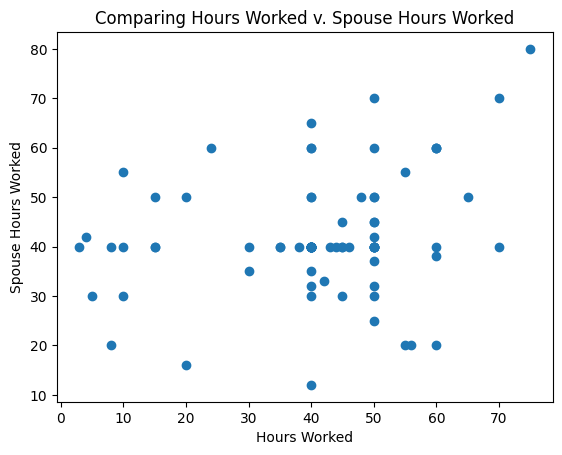

In [415]:
plt.scatter(df3['Hours'], df3['Spouse Hours Worked'])
plt.xlabel('Hours Worked')
plt.ylabel('Spouse Hours Worked')
plt.title('Comparing Hours Worked v. Spouse Hours Worked')

There appears to be no correlation between hours worked and spouse's hours worked. Could this possibly change among different education levels?

####Comparing Education Level and the Relationship between Partners Hours Worked

In [416]:
print(df['Education'].value_counts(), '\n')

Education
12th grade                    21401
4 years of college             9994
2 years of college             8208
1 year of college              5905
11th grade                     3942
3 years of college             3307
10th grade                     3010
6 years of college             2945
8th grade                      2786
5 years of college             2392
9th grade                      2172
8 or more years of college     1803
7 years of college             1112
7th grade                       896
6th grade                       866
5th grade                       410
4th grade                       326
3rd grade                       268
No formal schooling             177
2nd grade                       158
1st grade                        49
Name: count, dtype: int64 



Text(0.5, 1.0, 'Comparing Hours Worked v. Spouse Hours Worked')

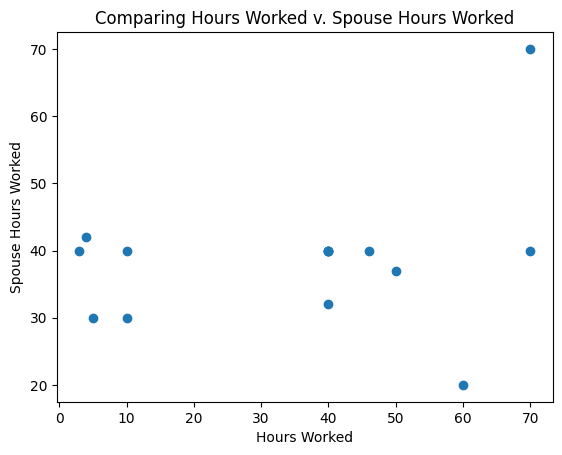

In [417]:
conditional1 =  (df3['Education']=='12th grade')
df12 = df3[conditional1]
plt.scatter(df12['Hours'], df12['Spouse Hours Worked'])
plt.xlabel('Hours Worked')
plt.ylabel('Spouse Hours Worked')
plt.title('Comparing Hours Worked v. Spouse Hours Worked')

Text(0.5, 1.0, 'Comparing Hours Worked v. Spouse Hours Worked')

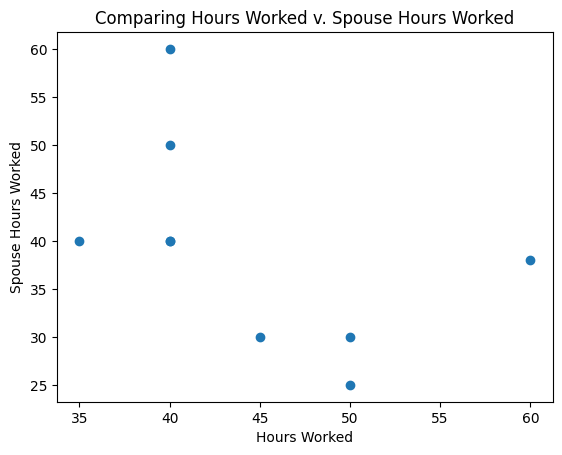

In [418]:
conditional2 =  (df3['Education']=='2 years of college')
df2years = df3[conditional2]
plt.scatter(df2years['Hours'], df2years['Spouse Hours Worked'])
plt.xlabel('Hours Worked')
plt.ylabel('Spouse Hours Worked')
plt.title('Comparing Hours Worked v. Spouse Hours Worked')

Text(0.5, 1.0, 'Comparing Hours Worked v. Spouse Hours Worked')

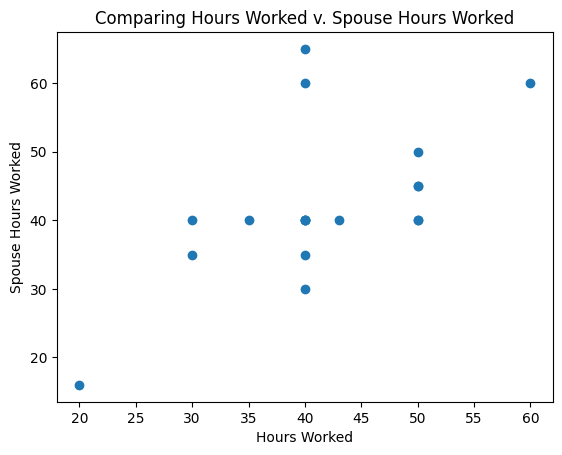

In [419]:
conditional4 =  (df3['Education']=='4 years of college')
df4years = df3[conditional4]
plt.scatter(df4years['Hours'], df4years['Spouse Hours Worked'])
plt.xlabel('Hours Worked')
plt.ylabel('Spouse Hours Worked')
plt.title('Comparing Hours Worked v. Spouse Hours Worked')

####Comparing Work Status and Spouse Work Status Proportions

In [420]:
workstatustab = pd.crosstab(df3['Work Status'], df3['Spouse Work Status'], normalize = 'index')
workstatustab

Spouse Work Status,KEEPING HOUSE,OTHER,RETIRED,SCHOOL,TEMP NOT WORKING,"UNEMPL, LAID OFF",WORKING FULLTIME,WORKING PARTTIME
Work Status,,,,,,,,
In school,0.072650,0.017094,0.025641,0.106838,0.012821,0.012821,0.666667,0.085470
Keeping house,0.025198,0.025558,0.181785,0.005400,0.017639,0.027358,0.670986,0.046076
Other,0.146199,0.146199,0.108187,0.002924,0.023392,0.035088,0.470760,0.067251
Retired,0.150046,0.018411,0.614913,0.001841,0.005523,0.006751,0.134704,0.067812
"Unemployed, laid off, looking for work",0.130243,0.028698,0.066225,0.013245,0.022075,0.064018,0.580574,0.094923
"With a job, but not at work because of temporary illness, vacation, strike",0.100877,0.028509,0.067982,0.008772,0.201754,0.015351,0.500000,0.076754
Working full time,0.154093,0.018149,0.033096,0.015125,0.016192,0.020819,0.631228,0.111299
Working part time,0.081557,0.018999,0.096386,0.007878,0.013902,0.023170,0.647822,0.110287


In [421]:
df3.columns

Index(['year', 'id', 'Work Status', 'Hours', 'prestige', 'Occupation',
       'Industry', 'marital', 'Spouse Work Status', 'Spouse Hours Worked',
       'Spouse Prestige', 'Spouse Occupation', 'Spouse Industry', 'Education',
       'Spouse Education'],
      dtype='object')

####Comparing differences in occupation make-up of Occupation and Spousal Occupation

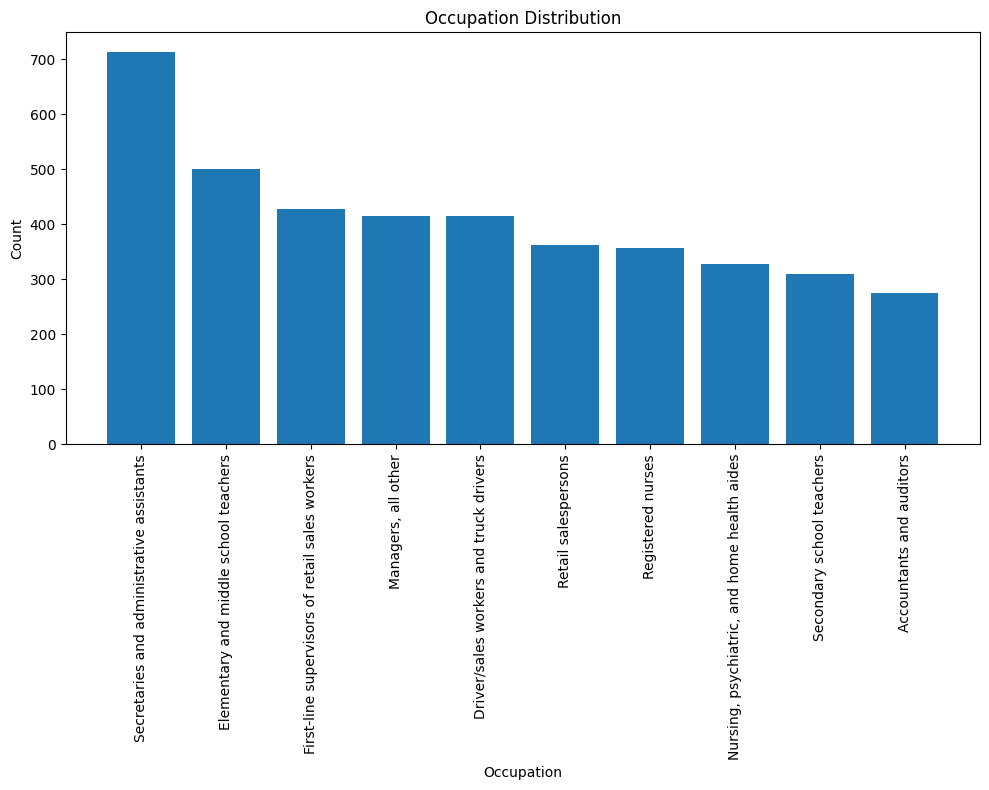

In [422]:
plt.figure(figsize=(10,8))
plt.bar(df3['Occupation'].value_counts().head(10).index, df3['Occupation'].value_counts().head(10).values)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

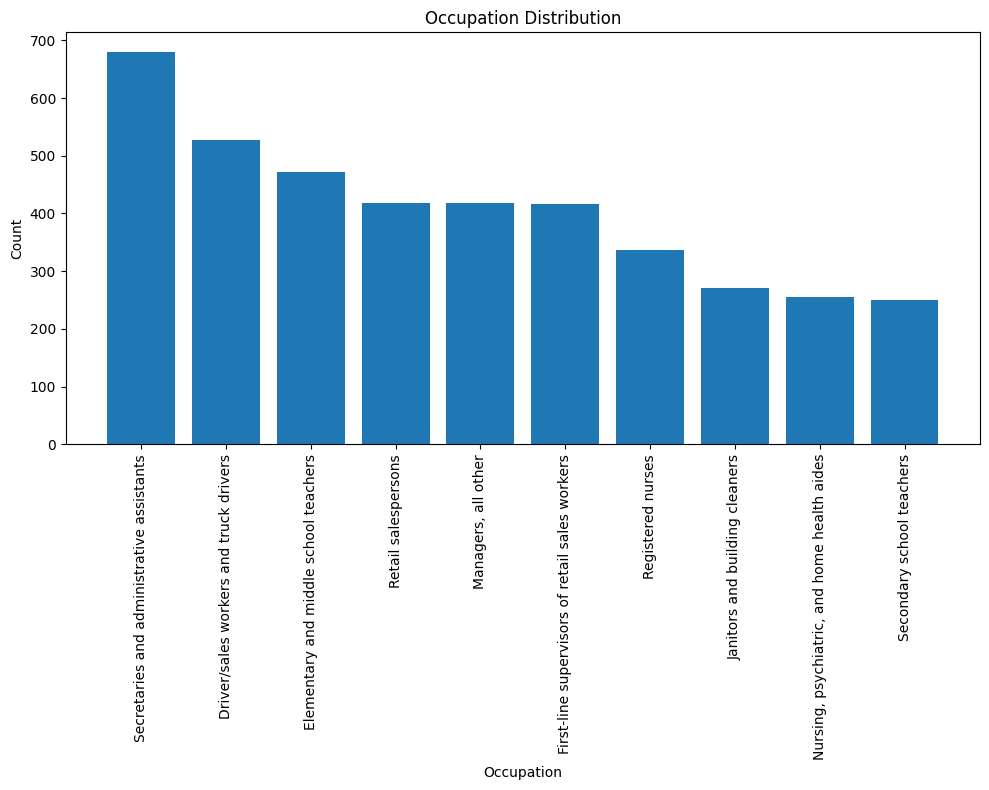

In [423]:
plt.figure(figsize=(10,8))
plt.bar(df3['Spouse Occupation'].value_counts().head(10).index, df3['Spouse Occupation'].value_counts().head(10).values)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Spousal Occupation Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

There appears to be no clear correlation in education level on hours worked between spouses. The only common pattern is a high amount of data centering around 40 hours a week, this is due to the common 40 hour work week.

####Comparing Education Levels of the Married Population

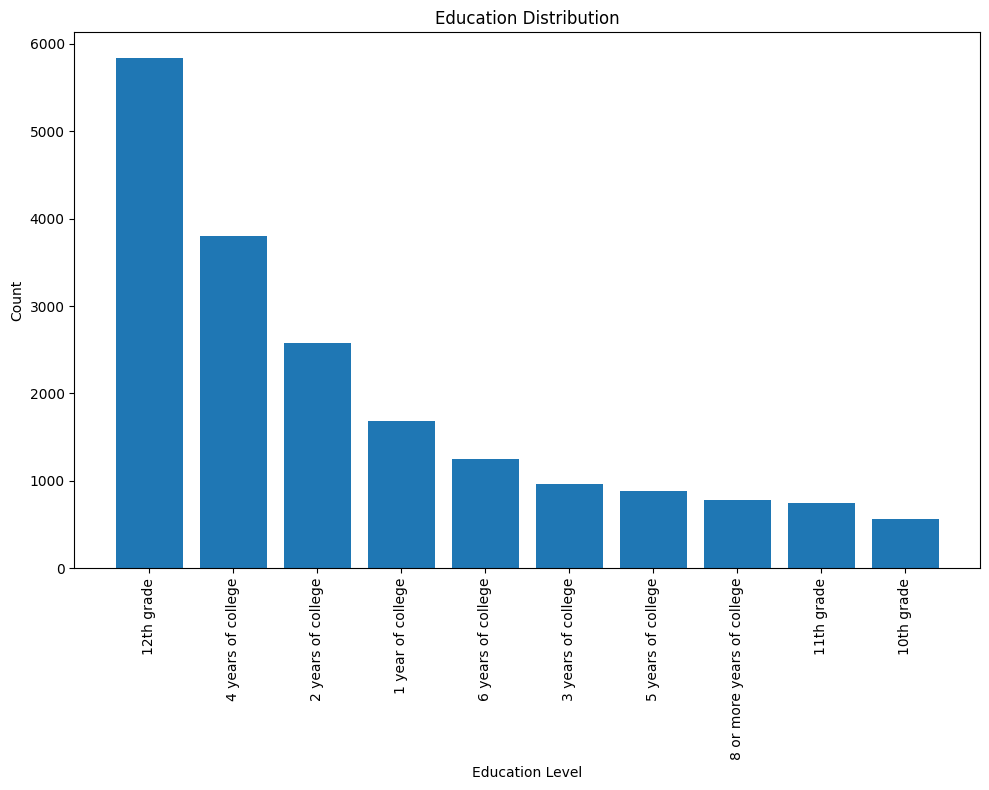

In [424]:
plt.figure(figsize=(10,8))
plt.bar(df3['Education'].value_counts().head(10).index, df3['Education'].value_counts().head(10).values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

##**Conclusions**
Though exploring differences between self and spousal data, I was able to discover relationships or the lack thereof between variables. I had a few key questions I wanted to answer:


*   Does the hours worked by one, affect the hours worked by their spouse? And does this change among educational levels?
*   Does ones work status relate to a spouses work status?

*   How does the makeup of top occupations compare between self reported data and spousal data?
*   What does the education distribution among the married population look like?

Through the process of filtering the data to only include people of married marital status between the years of 1990 - 2022, I was able to target a very specific time period and demographic to uncover these answers.


By exploring how hours worked by one affects the hours worked by their spouse, we can draw connections between how marriage in particular impacts working status. I wondered if there would be a clear positive relationship as people matched their spouses working hours, or a decreasing one as spouses may not work to tend to the house or children. It was very evident that there was no relationship between these two variables. The only pattern that exists is the clustering of data around 40 hours, representing the typical 40 hour work week. Next, I explored how education changes this relationship. There was still no clear correlation between the variables of hours worked and spousal hours worked, as well as no large impact of these variables frome education level.

Through comparing one's work status to a spouses work status in a cross tabulation showing the proportional makeup of these groups, I was able to see clear patterns and popular traits. First, spouses working full time made up a large majority of all of the work statuses. Though, this proportion was highest in people who were homemakers or in school and their spouse worked full time. I found this correlation interesting, yet intuitive. I also found that the proportion of spouses who are retired and their partners are retired is 0.61, making up most of the retired spouse category.

The makeup of top occupations for self reported data and spousal data is largely the same. I inferred that they would likely be similar, due to being a reflection of job demand rather than a clear correlation between job choice. Secretaries and Adminsitrative assistants rank highest between each category, the large differences occur at the lower proportions of occupations(these are still the top 10 occupations though). The discrepency lies within two occupations telling a conflicting story. It seems that accountants and auditors crept up last for self-reported occupation data, whereas, janitors and building cleaners was 8th highest for occupation for spouses. This may speak to the census data collected, it seems that self-reported data alluded to more white collar jobs, whereas, spousal data pointed to a more mixed workforce. I'm not honestly sure where this discrepancy would occur as the data is largely the same and should be more reflective of employment trends. Though, the difference is important in understanding how the population differs.

I decided to compare education levels among self-reported married respondents. I was curious to see what education level made up the largest proportion of married respondents. Ranking first by far was highschool diploma, though I feel like something could be said to the general increase in college enrollment and its effects. Baby boomers who may have not attended college would still be married, whereas, younger populations may be outweighted by this time lag in the data. Some type of college enrollment made up the next 7 top categories. Is this a reflection of stability, or simply a reflection of the social environment where people meet their partners?


The data provides powerful stories on the societal makeup of America. Though, I cannot draw definitive causation in most cases it is interesting to see the relationships or lack thereof between spouses and their professional lives.






